# Network Analysis for Real-time Applications

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Notebook link: [https://github.com/SNL-UCSB/cs176c-discussion-section/tree/master/spring24/week6](https://github.com/SNL-UCSB/cs176c-discussion-section/tree/master/spring24/week6)

# Download pcap at: [https://drive.google.com/file/d/1NauBO0-EG-RZVk_eK7mTvZdOFIbOdSOj/view?usp=drive_link](https://drive.google.com/file/d/1NauBO0-EG-RZVk_eK7mTvZdOFIbOdSOj/view?usp=drive_link)

### Review #1

1. What are the benefits of UDP / TCP in the case of video streaming?
2. What DNS requests are made when streaming video and why?
3. What are the benfits of chunk-based video streaming?

In [ ]:
%load ./review1-answers.txt

### Load up the PCAP in wireshark

We'll be taking a look at this pcap as a group to understand how we can identifying real-time traffic such as video conferencing.

1. What hostnames do you observe in this pcap? What service is this possibly for?
2. What are the downsides of using DNS for identification? Is it bulletproof?


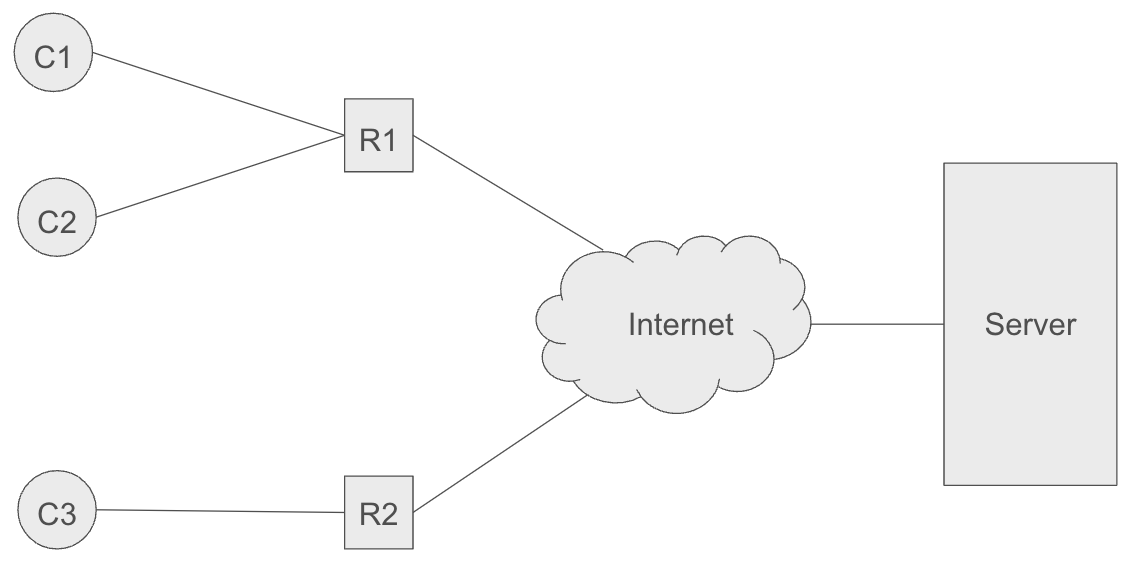

### Review #2
3. What are peer to peer connections, and how can they work amidst NAT?
4. What STUN requests are made and who they resolve to?
5. How does STUN fall short in identifying services that are being used?
6. What are the two IP addresses used in the video call within this pcap?

%load ./review2-answers.txt

# Introduction to RTP

## What is RTP?

RTP (Real-Time Protocol) is a network protocol used for delivering audio and video over IP networks. It is widely used in communication and entertainment systems that involve streaming media, such as telephony, video teleconferencing, and live video broadcasts.

## Key Features

1. **Real-Time Transmission**: Designed for real-time data transmission, ensuring timely delivery of media streams.
2. **Payload Type Identification**: Supports various media formats by identifying the payload type.
3. **Sequencing**: Uses sequence numbers to detect packet loss and reorder packets.
4. **Timestamping**: Uses timestamps to synchronize playback and ensure proper media timing.

## RTP Packet Structure

An RTP packet consists of a fixed header followed by a payload. Below is a breakdown of the key fields in the RTP header:

```
 0                   1                   2                   3
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|V=2|P|X|  CC   |M|     PT      |       Sequence Number         |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                           Timestamp                           |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|           Synchronization Source (SSRC) Identifier            |
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
|            Contributing Source (CSRC) Identifiers             |
|                             ....                              |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
```

### Header Fields

1. **Version (V)**: (2 bits) Indicates the version of RTP. The current version is 2.
2. **Padding (P)**: (1 bit) If set, the packet contains one or more additional padding bytes at the end.
3. **Extension (X)**: (1 bit) If set, the fixed header is followed by exactly one header extension.
4. **CSRC Count (CC)**: (4 bits) Indicates the number of CSRC identifiers that follow the SSRC.
5. **Marker (M)**: (1 bit) Used for marking significant events in the media stream (e.g., frame boundaries).
6. **Payload Type (PT)**: (7 bits) Indicates the format of the payload (e.g., audio or video codec type).
7. **Sequence Number**: (16 bits) Increments by one for each RTP packet sent. Used to detect packet loss and reorder packets.
8. **Timestamp**: (32 bits) Represents the sampling instant of the first byte in the RTP data packet. Used for synchronization.
9. **SSRC (Synchronization Source Identifier)**: (32 bits) Identifies the source of the RTP stream.
10. **CSRC (Contributing Source Identifiers)**: (32 bits each) Identifies contributing sources for the payload contained in this packet.

## RTP Payload

The payload of an RTP packet contains the media data (e.g., audio samples, video frames). The format of the payload is determined by the Payload Type (PT) field in the header.


### Review #3
7. Why is it only possible to use rtp as a display filter in wireshark and not a capture filter?
8. How many unique SSRCs do you observe in this pcap?

In [ ]:
%load ./review3-answers.txt

# WebRTC

## What is WebRTC?

WebRTC (Web Real-Time Communication) is an open-source project that provides web applications and websites with real-time communication capabilities (such as voice, video, and data sharing) via simple application programming interfaces (APIs). It enables peer-to-peer communication directly between browsers without requiring an intermediary server.

## Key Features

1. **Peer-to-Peer Communication**: WebRTC allows direct communication between two users’ devices, reducing latency and server load.
2. **Real-Time Data Exchange**: Supports high-quality audio, video, and data exchange.
3. **Cross-Platform Compatibility**: Works across different web browsers and platforms.
4. **Security**: Uses encryption (DTLS and SRTP) to ensure secure data transmission.

## How WebRTC Works

1. Javascript API
    - **getUserMedia()**: This API captures media from the user's device (camera, microphone).
    - **RTCPeerConnection**: This API is responsible for setting up and maintaining the peer-to-peer connection.
    - **RTCDataChannel**: This API allows the transfer of arbitrary data between peers.
2. API Implementation for each browser + Native implementation for OS

## Use Cases

- **Video Conferencing**: Applications like Google Meet, Zoom, and Microsoft Teams use WebRTC for real-time video communication.
- **File Sharing**: Peer-to-peer file transfer applications can use WebRTC to send files directly between users.
- **Gaming**: Real-time multiplayer games can leverage WebRTC for low-latency communication between players.

## Benefits

- **Low Latency**: Direct peer-to-peer communication reduces delay.
- **Scalability**: Offloads media traffic from servers to the clients.
- **Interoperability**: Works seamlessly across different browsers and devices.

## RTP Header Extensions

RTP header extensions allow for additional information to be included in the RTP packet without altering the standard header structure. This is useful for carrying supplementary data such as feedback information, application-specific data, or other control information.

### Header Extension Format

```
 0                   1                   2                   3
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|      defined by profile       |           length              |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                        header extension                       |
|                             ....                              |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
```

- **Defined by Profile**: (16 bits) Indicates the type of extension.
- **Length**: (16 bits) Specifies the length of the extension in 32-bit words.
- **Header Extension**: Variable-length field carrying the actual extension data.

One common use of RTP header extensions is to include additional synchronization information or to signal codec-specific parameters that are not part of the standard RTP header.

## Google's Congestion Control (CC)

Google's Congestion Control (CC) algorithm is designed to optimize the performance of RTP streams over varying network conditions. It dynamically adjusts the bitrate of the media stream to match the available network bandwidth, ensuring smooth and stable transmission.

### Key Concepts

1. **Bandwidth Estimation**: Continuously estimates available network bandwidth based on packet loss, delay, and jitter.
2. **Adaptive Bitrate**: Adjusts the encoding bitrate of the media stream to prevent congestion and packet loss.
3. **Feedback Mechanism**: Uses RTCP (Real-Time Control Protocol) reports to gather network performance metrics and adjust transmission parameters accordingly.


### Review #4
Isolate the packets for a single flow (src IP / dst IP / src Port / dst Port / protocol)  
9. Do you observe a sequence number-like header extension? If so which ID?  
10. Do you observe a timestamp-like header extension? If so which ID?   
11. Repeat this for the flow in the other direction, do you observe the same results?  


In [ ]:
%load ./review4-answers.txt

## On your own

If you want to extract these RTP headers programatically with wireshark you need to manually specify the ports to dissect with RTP and specify the ports manually for PORT1 and PORT2, or however many ports you want to specify as RTP. More on this next week

```tshark -r <pcap_name>" -d udp.port==PORT1,rtp -d udp.port==PORT2,rtp```